# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA




# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Dataset
df = pd.read_csv("Financial_Transactions_clustering.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan 5 baris pertama
print(df.head(5))  

   TransactionID  AccountID            Timestamp TransactionType  \
0          16633       5817  2016-01-01 03:47:23        transfer   
1          23660       9291  2016-01-01 04:20:25        transfer   
2          11806       9618  2016-01-01 05:12:44      withdrawal   
3          27498       2288  2016-01-01 05:48:42         payment   
4           9345       2688  2016-01-01 06:26:04        transfer   

   TransactionAmount  AccountBalance  
0            2446.41        96273.47  
1            2640.83        98629.95  
2             574.82        65602.63  
3            1740.12        81461.66  
4             292.43        18084.81  


In [5]:
# Melihat tipe data dan nilai yang hilang
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37417 entries, 0 to 37416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      37417 non-null  int64  
 1   AccountID          37417 non-null  int64  
 2   Timestamp          37417 non-null  object 
 3   TransactionType    37417 non-null  object 
 4   TransactionAmount  37417 non-null  float64
 5   AccountBalance     37417 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.7+ MB


In [6]:
# Statistik dasar dataset
print(df.describe(include="all"))  

        TransactionID     AccountID            Timestamp TransactionType  \
count    37417.000000  37417.000000                37417           37417   
unique            NaN           NaN                37416               4   
top               NaN           NaN  2023-01-03 12:56:17         deposit   
freq              NaN           NaN                    2            9450   
mean     18709.000000   5488.722639                  NaN             NaN   
std      10801.501848   2594.176059                  NaN             NaN   
min          1.000000   1000.000000                  NaN             NaN   
25%       9355.000000   3238.000000                  NaN             NaN   
50%      18709.000000   5492.000000                  NaN             NaN   
75%      28063.000000   7735.000000                  NaN             NaN   
max      37417.000000   9999.000000                  NaN             NaN   

        TransactionAmount  AccountBalance  
count        37417.000000    37417.000000  

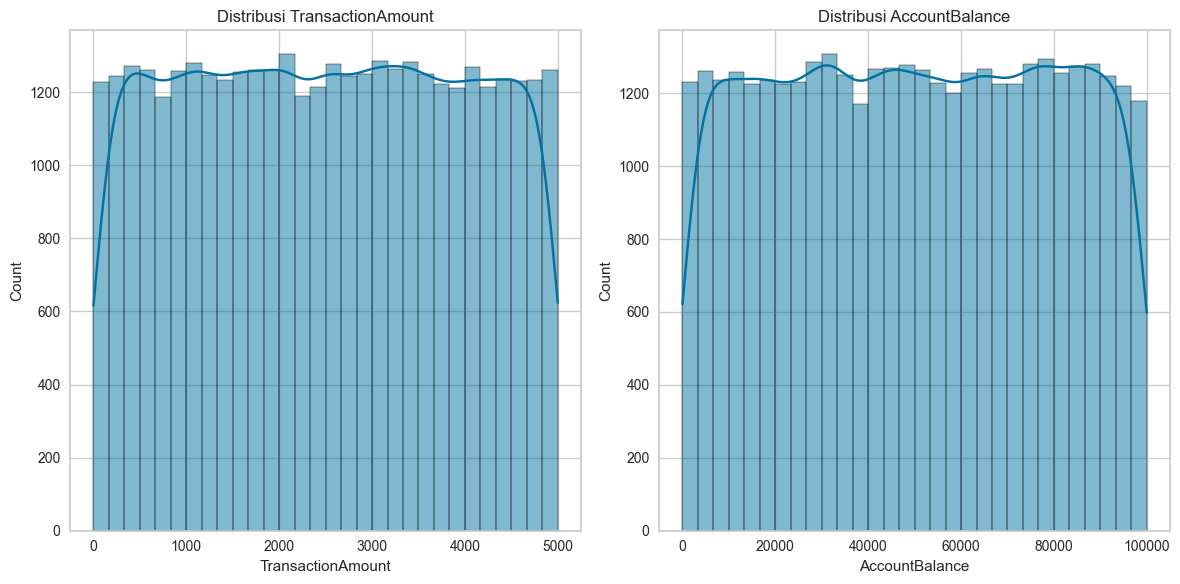

In [7]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 6))
numerical_features = ["TransactionAmount", "AccountBalance"]  # Ganti dengan fitur numerik yang sesuai
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribusi {feature}")
plt.tight_layout()
plt.show()

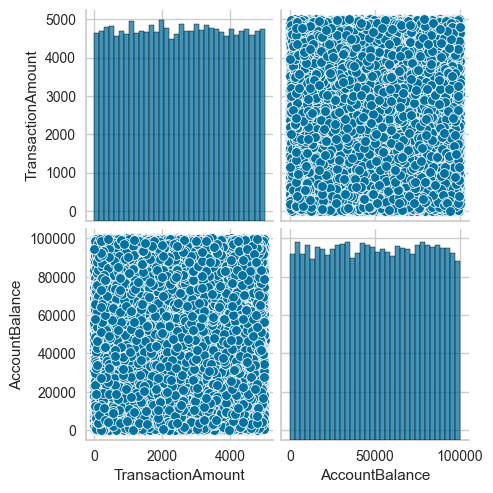

In [8]:
# Visualisasi hubungan antara fitur numerik
sns.pairplot(df[numerical_features])
plt.show()

C:\Users\ejaad\AppData\Local\Temp\ipykernel_4468\1414007908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["TransactionType"], palette="Set2")


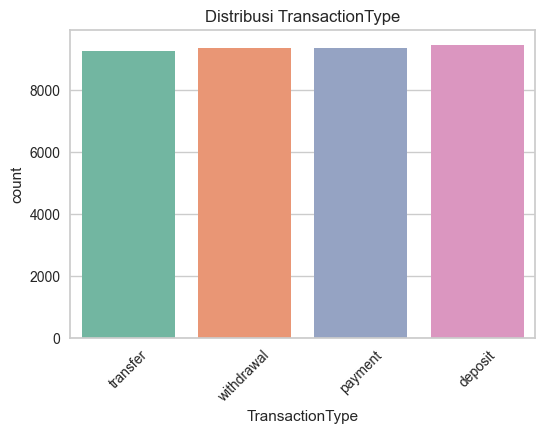

In [9]:
# Visualisasi fitur kategorikal
categorical_features = ["TransactionType"]
plt.figure(figsize=(6, 4))
sns.countplot(x=df["TransactionType"], palette="Set2")
plt.title("Distribusi TransactionType")
plt.xticks(rotation=45)
plt.show()

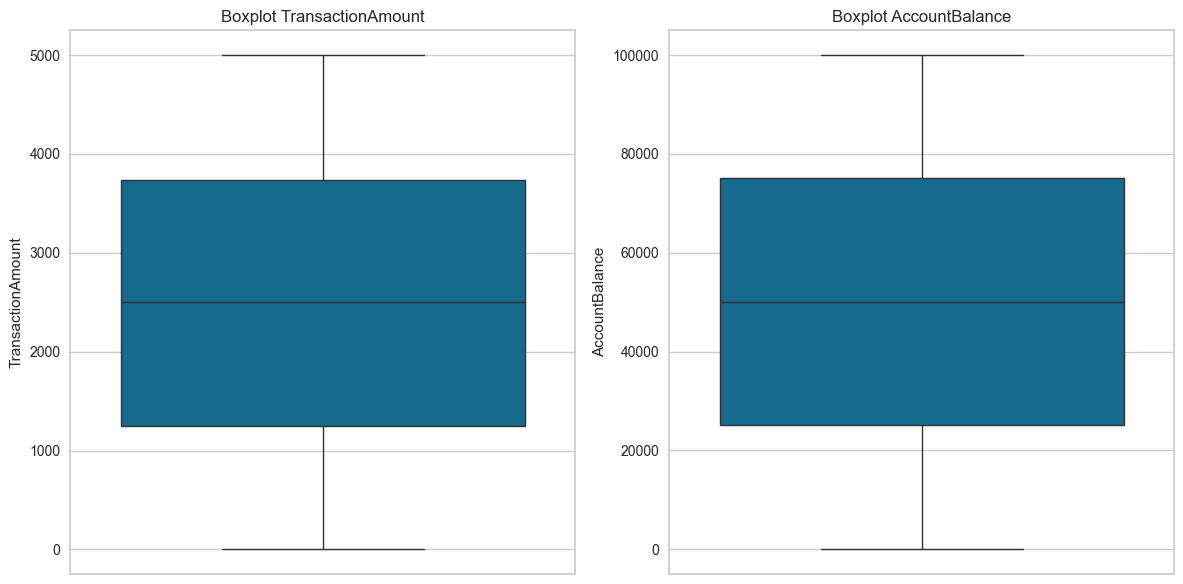

In [10]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot {feature}")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# Cek missing values
print("Missing Values in data:")
print(df.isna().sum())

Missing Values in data:
TransactionID        0
AccountID            0
Timestamp            0
TransactionType      0
TransactionAmount    0
AccountBalance       0
dtype: int64


In [12]:
# Menghapus baris dengan nilai kosong
df.dropna(inplace=True)


In [13]:
# Cek duplikasi
print("\nJumlah duplikasi pada data", df.duplicated().sum())


Jumlah duplikasi pada data 0


In [14]:
# hapus duplikasi
df.drop_duplicates(inplace=True)

In [15]:
# Menghitung IQR untuk Outlier Handling 
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]


In [16]:
# Ekstraksi fitur waktu dari Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [17]:
# Encoding Data Kategorikal 
categorical_cols = ["TransactionType"] 
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_features = encoder.fit_transform(df[categorical_cols])

# Buat DataFrame dari hasil encoding
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))


In [18]:
# Gabungkan hasil encoding ke df 
df = df.drop(columns=categorical_cols)  # Hapus kolom kategori asli
df = pd.concat([df, encoded_df], axis=1)  # Gabungkan hasil encoding

# Simpan encoder untuk digunakan pada proses transformasi
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [19]:
# Normalisasi fitur numerik
numeric_cols = ["TransactionAmount", "AccountBalance", "Hour", "Month"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Simpan normalisasi untuk digunakan pada proses transformasi
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [20]:
# Memilih Fitur untuk Clustering
features = numeric_cols + list(encoded_df.columns)  # Gunakan fitur numerik & hasil encoding
X = df[features].select_dtypes(include=[np.number])  # Pastikan hanya menggunakan fitur numerik

In [21]:
# Cek apakah data siap
print(f"Fitur yang digunakan untuk clustering: {features}")
print(f"Dimensi data setelah preprocessing: {X.shape}")

Fitur yang digunakan untuk clustering: ['TransactionAmount', 'AccountBalance', 'Hour', 'Month', 'TransactionType_deposit', 'TransactionType_payment', 'TransactionType_transfer', 'TransactionType_withdrawal']
Dimensi data setelah preprocessing: (37417, 8)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
labels = kmeans.fit_predict(X)  # Menggunakan fit_predict untuk mendapatkan label langsung

# Menambahkan label ke dalam DataFrame asli
df['Cluster'] = labels

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k, feature_names):
    print("Analisis Karakteristik Setiap Cluster:")
    
    # Ubah X ke DataFrame untuk analisis yang lebih mudah
    X_df = pd.DataFrame(X, columns=feature_names)
    X_df['Cluster'] = labels  # Tambahkan label cluster
    
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_df[X_df['Cluster'] == cluster_id]
        
        print(f"\nCluster {cluster_id + 1}:")
        for feature in feature_names:
            mean_value = cluster_data[feature].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

# Panggil fungsi analisis cluster
analyze_clusters(X, labels, 4, X.columns.tolist())

c:\Users\ejaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ejaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.18
Rata-rata AccountBalance: -0.95
Rata-rata Hour: 0.81
Rata-rata Month: 0.06
Rata-rata TransactionType_deposit: 0.26
Rata-rata TransactionType_payment: 0.24
Rata-rata TransactionType_transfer: 0.25
Rata-rata TransactionType_withdrawal: 0.25

Cluster 2:
Rata-rata TransactionAmount: -0.16
Rata-rata AccountBalance: 0.93
Rata-rata Hour: 0.82
Rata-rata Month: 0.01
Rata-rata TransactionType_deposit: 0.25
Rata-rata TransactionType_payment: 0.26
Rata-rata TransactionType_transfer: 0.25
Rata-rata TransactionType_withdrawal: 0.24

Cluster 3:
Rata-rata TransactionAmount: 0.94
Rata-rata AccountBalance: 0.19
Rata-rata Hour: -0.81
Rata-rata Month: -0.01
Rata-rata TransactionType_deposit: 0.25
Rata-rata TransactionType_payment: 0.24
Rata-rata TransactionType_transfer: 0.26
Rata-rata TransactionType_withdrawal: 0.25

Cluster 4:
Rata-rata TransactionAmount: -0.95
Rata-rata AccountBalance: -0.18
Rata-rata Hour: -0.79
Rata

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

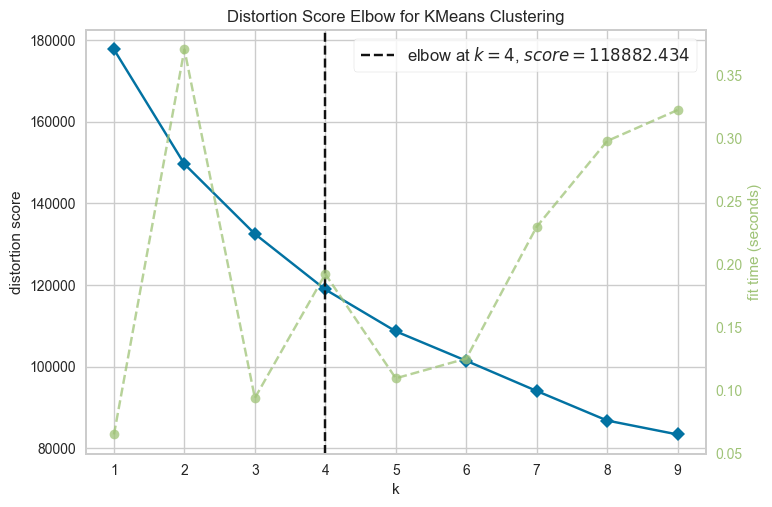

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Evaluasi menggunakan elbow methods
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [24]:
# Silhouette Score untuk menentukan jumlah cluster optimal 
silhouette_scores = []
cluster_range = range(2, 5)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score:.4f}")

Jumlah Cluster: 2, Silhouette Score: 0.1528
Jumlah Cluster: 3, Silhouette Score: 0.1413
Jumlah Cluster: 4, Silhouette Score: 0.1473


In [25]:
# Davies-Bouldin Index
db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")



Davies-Bouldin Score: 1.8147
Calinski-Harabasz Score: 6210.1136


In [43]:
df['Cluster'].nunique()

4

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

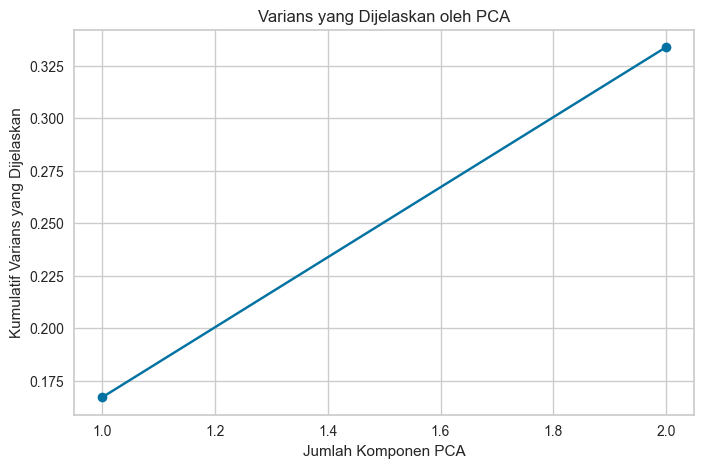

In [26]:
# Upaya meningkatkan nilai silhoute score
# Lakukan standarisasi sebelum PCA
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Reduksi dimensi ke 2 untuk visualisasi
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_standardized)

# Visualisasi varians yang dijelaskan oleh PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_2d.explained_variance_ratio_) + 1), pca_2d.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("Varians yang Dijelaskan oleh PCA")
plt.show()


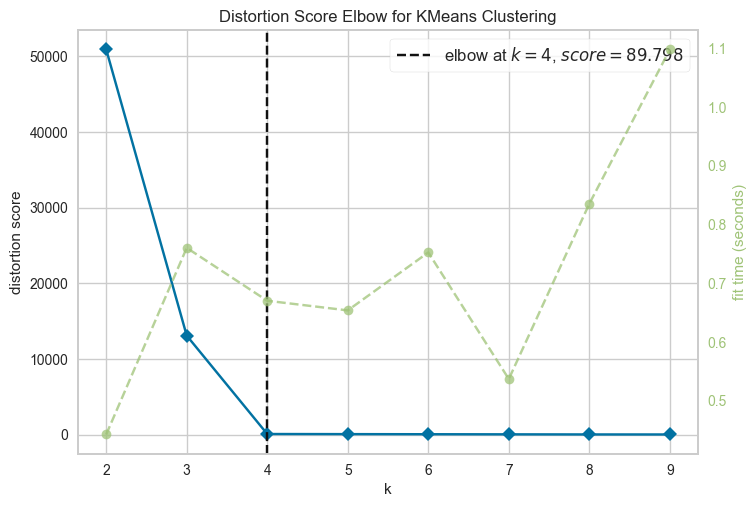

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Elbow methods setelah PCA
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_pca_2d)
visualizer.show()

In [28]:
# Lakukan clustering dengan data hasil PCA
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)  # Menggunakan hasil PCA 2D

# Evaluasi dengan Silhouette Score
silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
print(f"Silhouette Score akhir: {silhouette_pca:.4f}")



Silhouette Score akhir: 0.9677


In [29]:
# Analisis setiap cluster setelah PCA
def analyze_clusters_pca(X_pca, labels, k):
    print("Analisis Karakteristik Setiap Cluster (dalam ruang PCA):")
    
    # Ubah X ke DataFrame untuk analisis yang lebih mudah
    X_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    X_df['Cluster'] = labels  
    
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_df[X_df['Cluster'] == cluster_id]
        
        print(f"\nCluster {cluster_id + 1}:")
        for feature in X_df.columns[:-1]:  # Exclude 'Cluster' column
            mean_value = cluster_data[feature].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

# Panggil fungsi analisis cluster
analyze_clusters_pca(X_pca_2d, labels_pca, 4)


Analisis Karakteristik Setiap Cluster (dalam ruang PCA):

Cluster 1:
Rata-rata PC1: -0.90
Rata-rata PC2: -1.58

Cluster 2:
Rata-rata PC1: -0.69
Rata-rata PC2: 1.68

Cluster 3:
Rata-rata PC1: 1.96
Rata-rata PC2: -0.13

Cluster 4:
Rata-rata PC1: -0.40
Rata-rata PC2: 0.03


In [30]:
# Davies-Bouldin Index
db_score = davies_bouldin_score(X_pca_2d, labels)
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_pca_2d, labels)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

Davies-Bouldin Score: 179.9104
Calinski-Harabasz Score: 11.4163


In [44]:
df['Cluster'].nunique()

4

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

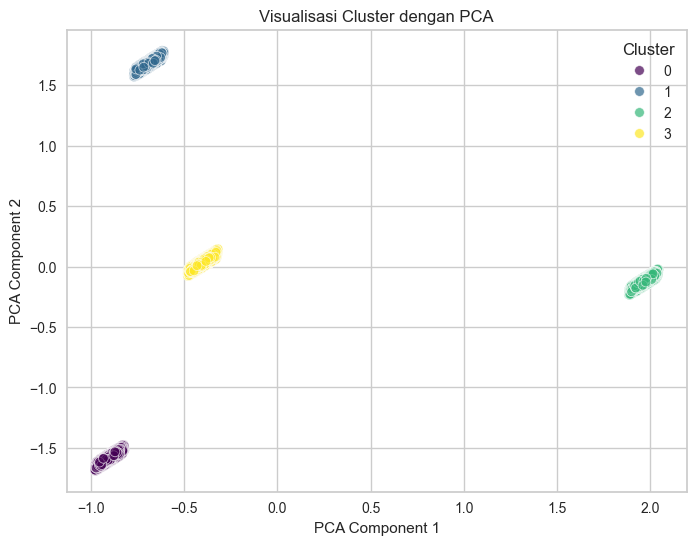

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=labels_pca, palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Cluster dengan PCA")
plt.legend(title="Cluster")
plt.show()


C:\Users\ejaad\AppData\Local\Temp\ipykernel_4468\3460705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette="viridis")


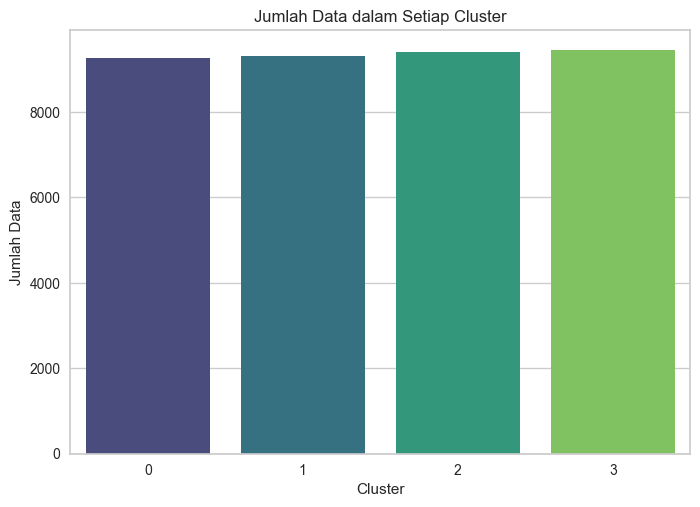

In [32]:
sns.countplot(x=df['Cluster'], palette="viridis")
plt.title("Jumlah Data dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

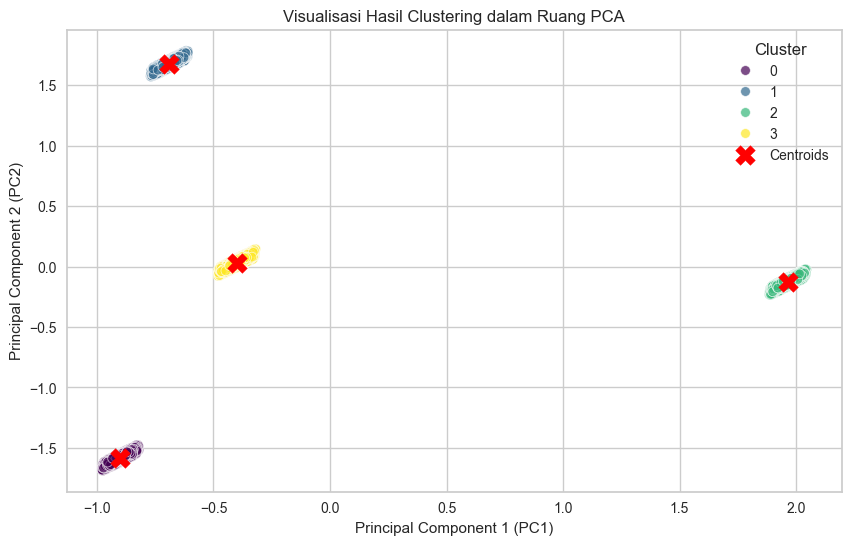

In [33]:
# Menambahkan label cluster ke dataframe hasil PCA
df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca

# Visualisasi hasil clustering dalam ruang PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca["PC1"], 
    y=df_pca["PC2"], 
    hue=df_pca["Cluster"], 
    palette="viridis", 
    alpha=0.7
)

# Menandai centroids cluster dalam ruang PCA
centroids_pca = kmeans_pca.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", marker="X", s=200, label="Centroids")

# Menampilkan plot
plt.title("Visualisasi Hasil Clustering dalam Ruang PCA")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster")
plt.show()



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
# Tambahkan hasil label cluster ke DataFrame yang telah dinormalisasi
df['Cluster'] = labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
# Reversi normalisasi hanya untuk fitur numerik yang telah dinormalisasi
scaler = joblib.load("scaler.pkl")  # Load scaler yang telah dipakai sebelumnya
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])


In [36]:
print("Kategori dalam encoder:", encoder.categories_)

# Pastikan jumlah kolom sesuai
print("Kolom hasil encoding yang diharapkan:", encoder.get_feature_names_out(categorical_cols))
print("Kolom dalam df setelah encoding:", df.columns)

Kategori dalam encoder: [array(['deposit', 'payment', 'transfer', 'withdrawal'], dtype=object)]
Kolom hasil encoding yang diharapkan: ['TransactionType_deposit' 'TransactionType_payment'
 'TransactionType_transfer' 'TransactionType_withdrawal']
Kolom dalam df setelah encoding: Index(['TransactionID', 'AccountID', 'Timestamp', 'TransactionAmount',
       'AccountBalance', 'Hour', 'DayOfWeek', 'Month',
       'TransactionType_deposit', 'TransactionType_payment',
       'TransactionType_transfer', 'TransactionType_withdrawal', 'Cluster'],
      dtype='object')


In [37]:
# Load encoder
encoder = joblib.load("encoder.pkl")

# Ambil hanya kolom hasil encoding
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Pastikan hanya kolom hasil encoding yang dipakai untuk inverse_transform
df['TransactionType'] = encoder.inverse_transform(df[encoded_cols]).ravel()  # atau gunakan [:, 0]

# Hapus kolom hasil encoding setelah inverse transform
df.drop(columns=encoded_cols, inplace=True)


In [38]:
print(df.isna().sum())  # Cek missing values
print(df.dtypes)  # Cek tipe data


TransactionID        0
AccountID            0
Timestamp            0
TransactionAmount    0
AccountBalance       0
Hour                 0
DayOfWeek            0
Month                0
Cluster              0
TransactionType      0
dtype: int64
TransactionID                 int64
AccountID                     int64
Timestamp            datetime64[ns]
TransactionAmount           float64
AccountBalance              float64
Hour                        float64
DayOfWeek                     int32
Month                       float64
Cluster                       int32
TransactionType              object
dtype: object


In [39]:
df.describe()

,TransactionID,AccountID,Timestamp,TransactionAmount,AccountBalance,Hour,DayOfWeek,Month,Cluster
count,37417.000000,37417.000000,37417,37417.000000,37417.000000,37417.000000,37417.000000,37417.000000,37417.000000
mean,18709.000000,5488.722639,2020-04-04 08:22:25.777186560,2497.803731,50008.565115,11.450250,3.000775,6.354545,1.506000
min,1.000000,1000.000000,2016-01-01 03:47:23,1.030000,0.840000,0.000000,0.000000,1.000000,0.000000
25%,9355.000000,3238.000000,2018-02-26 14:41:32,1250.070000,25209.570000,6.000000,1.000000,3.000000,1.000000
50%,18709.000000,5492.000000,2020-04-02 09:35:51,2502.300000,49941.670000,11.000000,3.000000,6.000000,2.000000
75%,28063.000000,7735.000000,2022-05-16 23:47:29,3739.540000,75155.420000,17.000000,5.000000,9.000000,3.000000
max,37417.000000,9999.000000,2024-06-30 21:43:18,4999.620000,99997.210000,23.000000,6.000000,12.000000,3.000000
std,10801.501848,2594.176059,NaN,1440.511158,28804.646061,6.909054,2.004625,3.433665,1.117877


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [40]:
# Ringkasan statistik per-Cluster
print(df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'std'],
    'AccountBalance': ['mean', 'median', 'min', 'max', 'std'],
    'Hour': ['mean', 'median'],
    'DayOfWeek': ['mean', 'median'],
    'Month': ['mean', 'median'],
    'TransactionType': lambda x: x.value_counts().to_dict()  # Distribusi transaksi
}))


        TransactionAmount                                           \
                     mean    median      min      max          std   
Cluster                                                              
0             2756.200799  2833.690     1.03  4998.95  1306.891790   
1             3849.291969  3904.090  2068.33  4999.62   734.578598   
2             2262.404729  2169.180     1.15  4998.66  1304.034002   
3             1130.135238  1058.835     1.06  2963.36   723.928543   

        AccountBalance                                               \
                  mean     median       min       max           std   
Cluster                                                               
0         22553.424557  21284.935      0.84  58438.73  14516.393770   
1         55565.849359  57021.390     17.13  99993.97  26103.386309   
2         76916.783876  78109.380  40853.27  99987.51  14505.991246   
3         44869.206666  43418.485      1.67  99997.21  26170.379046   

           

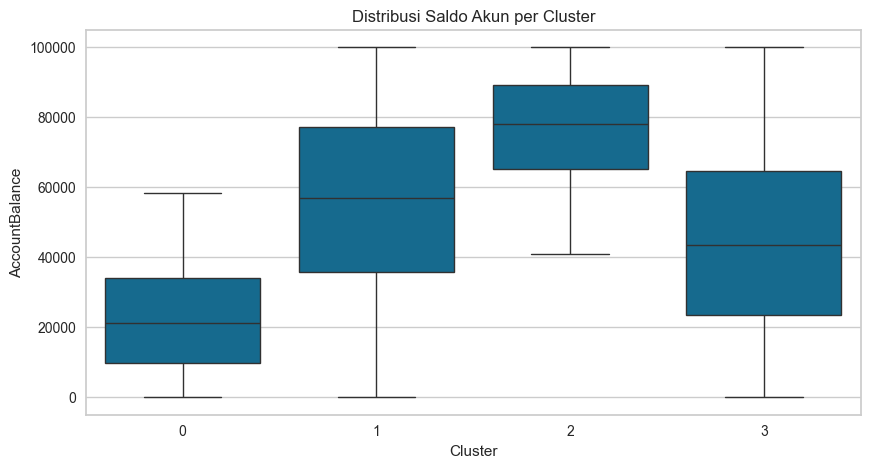

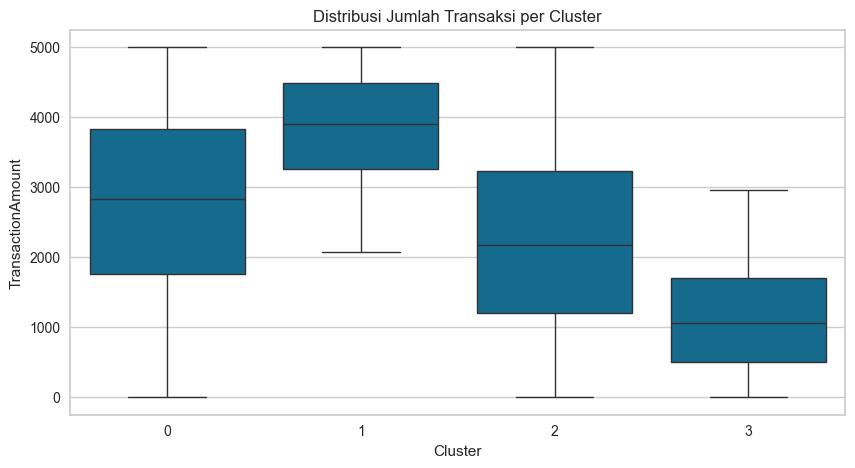

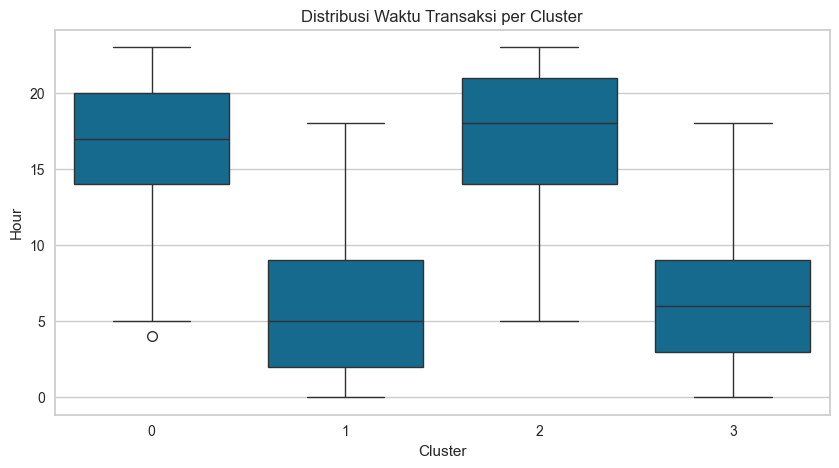

In [41]:
# Distribusi saldo akun per cluster
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="AccountBalance", data=df)
plt.title("Distribusi Saldo Akun per Cluster")
plt.show()

# Distribusi jumlah transaksi per cluster
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="TransactionAmount", data=df)
plt.title("Distribusi Jumlah Transaksi per Cluster")
plt.show()

# Distribusi waktu transaksi per cluster
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Hour", data=df)
plt.title("Distribusi Waktu Transaksi per Cluster")
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0: adalah kelompok dengan saldo rendah dan sering bertransaksi di malam hari, memiliki kebiasaan withdrawal dan transfer yang cukup tinggi. 

2. Cluster 1: kelompok dengan saldo tinggi yang seling melakukan pembayaran, lebih jarang bertransaksi dibanding kelompok lain.

3. Cluster 2: kelompok dengan saldo menengah dengan intensitas transaksi tinggi di pagi hari, transaksi didominasi oleh transfer.

4. Cluster 3: kelompok dengan saldo menengah tetapi transaksi kecil,
lebih sering melakukan withdrawal dibanding kelompok yang lain.

# Interpretasi Hasil Clustering 
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Saldo Rata-rata :** 22.553 (Terendah) 
- **Jumlah Transaksi Rata-rata :** 2.756 
- **Waktu Transaksi :** Malam hari Rata-rata 17:00
- **Jenis Transaksi :** Campuran antara deposit, withdrawal, dan transfer
- **Analisis:** Cluster ini menunjukan bahwa intensitas kegiatan malah hari yang cukup tinggi promo khusus transaksi malam, misalnya cashback untuk transfer di atas jumlah tertentu. selain itu kita juga dapat menawarkan program edukasi finansial untuk meningkatkan saldo mereka.


## Cluster 1:
- **Saldo Rata-rata :** 76.916 (tertinggi)  
- **Jumlah Transaksi Rata-rata :** 2.262  
- **Waktu Transaksi :** Dominan malam hari  18:00
- **Jenis Transaksi :** Banyak melakukan pembayaran
- **Analisis:** Cluser ini menunjukkan pelanggan dengan pendapatan tinggi dan pengeluaran yang tinggi. Pelanggan di cluster ini merupakan kelompok premium yang cocok dengan produk investasi atau tabungan berbunga tinggi.

## Cluster 2:
- **Saldo Rata-rata :** 55.565
- **Jumlah Transaksi Rata-rata :** 3.849 (tertinggi)
- **Waktu Transaksi :** Dominan pagi hari 05:00
- **Jenis Transaksi :** Mayoritas transfer 
- **Analisis:** Cluster ini menunjukan pendapatan menengah tetapi pengeluaran yang sangat tinggi. Mereka mungkin memiliki suatu kegiatan bisnis yang intens sehingga aktif dalam berbelanja. menawarkan program layanan transaksi premium atau prioritas untuk meningkatkan efisiensi mereka adalah hal yang cukup tepat.

## Cluster 3:
- **Saldo Rata-rata :** 44.869
- **Jumlah Transaksi Rata-rata :** 1.130 (terendah)
- **Waktu Transaksi :** Dominan pagi hari 06:00
- **Jenis Transaksi :** Mayoritas withdrawal 	
- **Analisis:** Cluster ini menunjukan pendapatan menengah tetapi pengeluaran yang rendah. Lebih sering melakukan withdrawal dan melakukan transaksi menggunakan tunai, mereka mungkin kelompok dengan kehidupan yang kurang bergantung pada transaksi digital. mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [42]:
df.to_csv("dataset_Financial_Transactions_klasifikasi.csv", index=False)